<a href="https://colab.research.google.com/github/vaibhav251999/Projects/blob/main/raktim%20cv_practical_3rd_sem_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alex net

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [ ]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

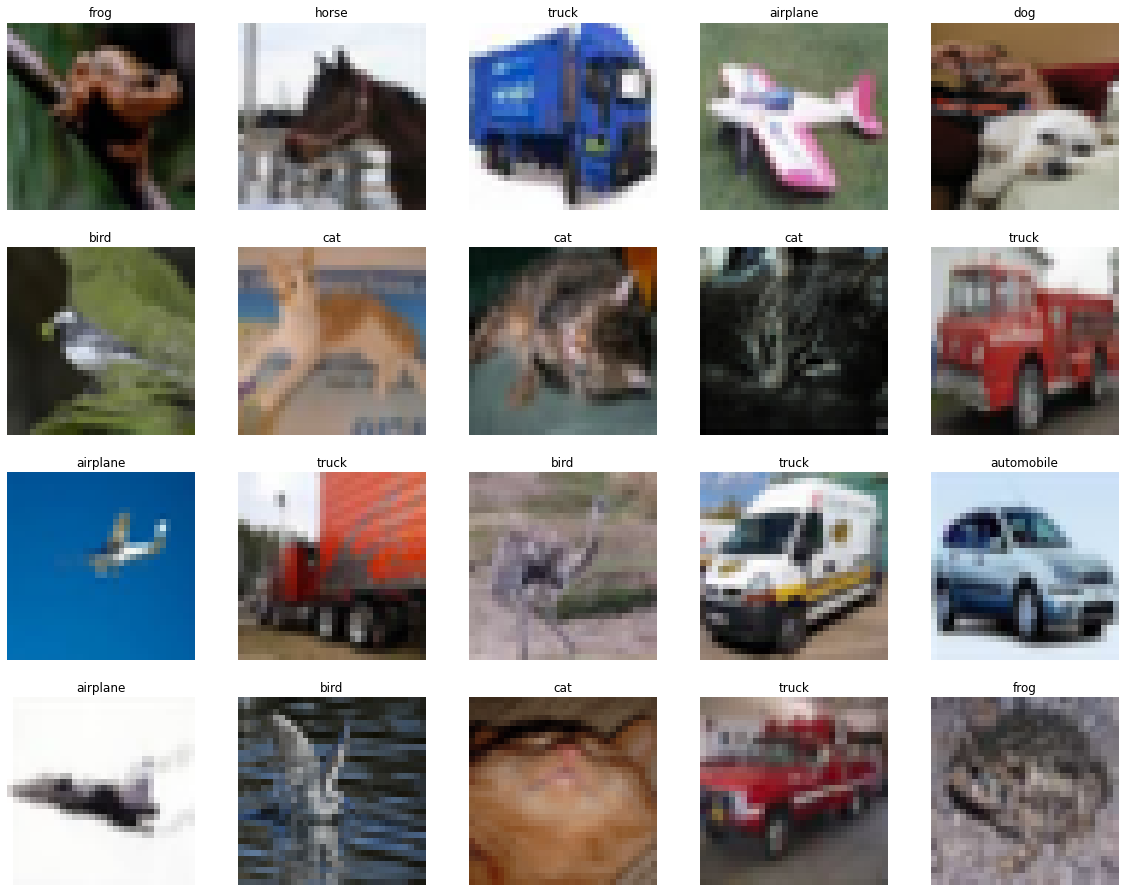

In [ ]:
plt.figure(figsize=(20,20))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [ ]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [ ]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 45000
Test size: 10000


In [ ]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


                                                                 
Total params: 2,915,338
Trainable params: 2,913,034
Non-trainable params: 2,304
_________________________________________________________________


In [ ]:
history=model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/10
1406/1406 [==============================] - 522s 367ms/step - loss: 2.1554 - accuracy: 0.2427 - val_loss: 1.6299 - val_accuracy: 0.4172
Epoch 2/10
1406/1406 [==============================] - 523s 369ms/step - loss: 1.7410 - accuracy: 0.3651 - val_loss: 1.4641 - val_accuracy: 0.4743
Epoch 3/10
1406/1406 [==============================] - 527s 372ms/step - loss: 1.5718 - accuracy: 0.4297 - val_loss: 1.3758 - val_accuracy: 0.4998
Epoch 4/10
 349/1406 [======>.......................] - ETA: 6:10 - loss: 1.4818 - accuracy: 0.4630

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_ds)

#1)Read an image and show it on the screen using following libraries - Pillow (Pill), Matplotlib, Scikit, OpenCV

In [ ]:
path="/content/MarkZuckerberg-crop.jpg"

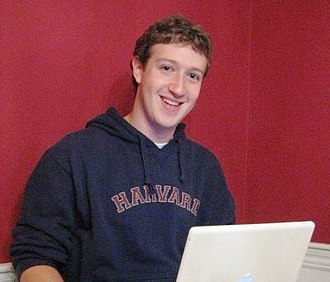

In [ ]:
#pillow
from PIL import Image
img = Image.open(path)
img.show()
display(img)

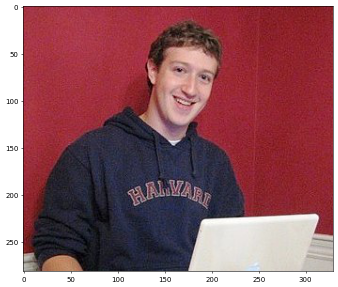

In [ ]:
#matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
image = mpimg.imread(path)
figure(figsize=(8, 8), dpi=50)
plt.imshow(image)
plt.show()

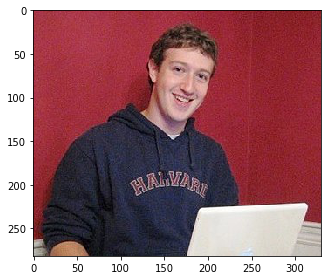

In [ ]:
#scikit sklearn
from skimage import io
 
img = io.imread(path)
io.imshow(img)

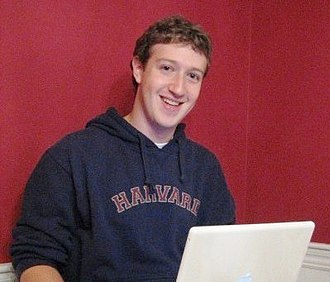

In [ ]:
#open cv
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread(path,3)
cv2_imshow(img)

#2)Read an image and perform - reverse contrast, stretching contrast, Histogram equalization. Show both the input and output image on the screen.

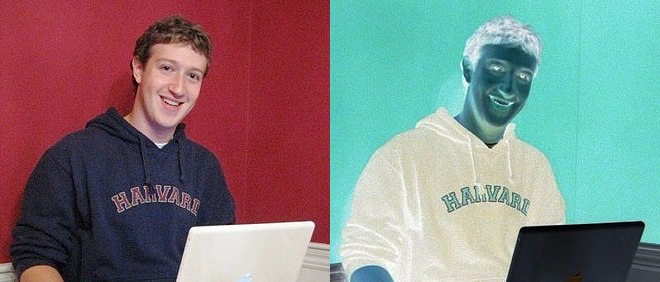

In [ ]:
#reverse contrast
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread(path)

img_final = cv2.bitwise_not(img)

concat = np.concatenate((img, img_final), axis=1)
cv2_imshow(concat)

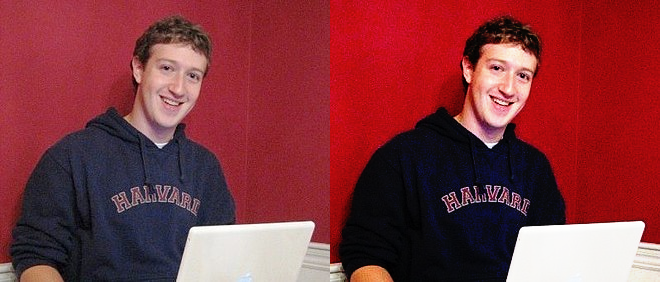

In [ ]:
#stretching contrast
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread(path)
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)
concat = np.concatenate((original, img), axis=1)
cv2_imshow(concat)

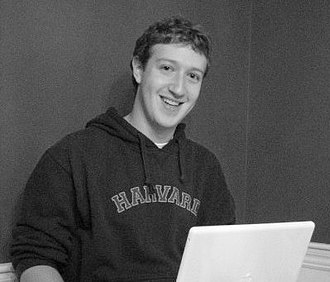

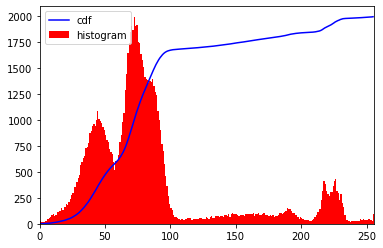

In [ ]:
#histogram equalization
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv.imread(path,0)
cv2_imshow(img)
print('\n\n')
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

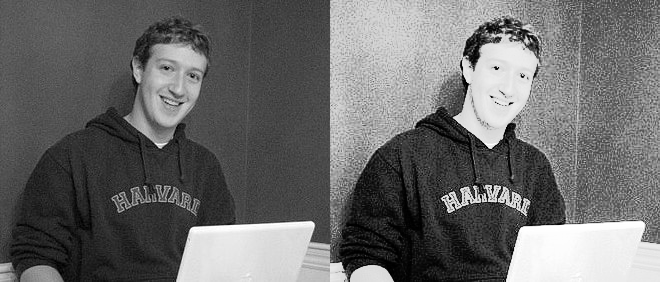

In [ ]:
eq = cv2.equalizeHist(img)
concat = np.concatenate((img, eq), axis=1)
cv2_imshow(concat)

#3)average filtering

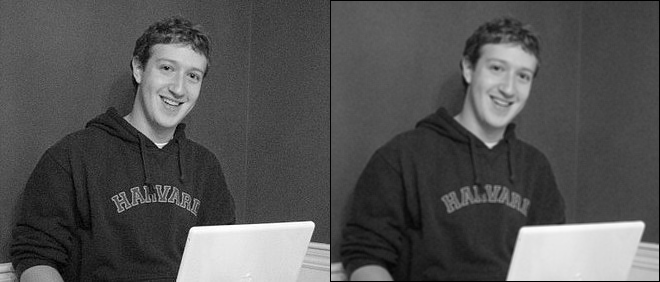

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread(path, 0)
 
m, n = img.shape

mask = np.ones([3, 3], dtype = int)
mask = mask / 9

img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
img_new = img_new.astype(np.uint8)
concat = np.concatenate((img, img_new), axis=1)
cv2_imshow(concat)


OR for dataset

In [ ]:
from PIL import Image
import os
import numpy as np
from scipy import ndimage


# path to the dataset
dataset_path = r"C:\Users\Raktim sankar bora\OneDrive\Desktop\PetImages\cat_image"

# size of the averaging filter
filter_size = 3

# apply averaging filter to all images in the dataset
for file_name in os.listdir(dataset_path):
    # open the image
    img = Image.open(os.path.join(dataset_path, file_name))
    # convert image to numpy array
    img_array = np.array(img)
    # apply averaging filter
    img_filtered = ndimage.uniform_filter(img_array, size=filter_size)
    # convert filtered image back to PIL image
    img_filtered = Image.fromarray(img_filtered)
    # save the filtered image
    img_filtered.save(os.path.join(dataset_path, 'filtered_' + file_name))

#4)Gaussian filter

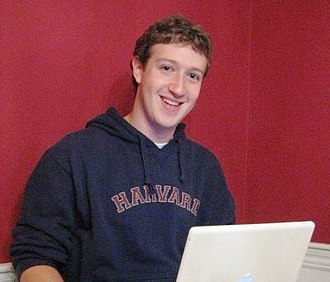

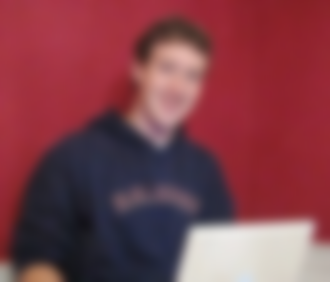

In [ ]:
from PIL import Image, ImageFilter 
  
# creating a image object 
im1 = Image.open(path) 
im1.show()
display(im1)
print("\n\n")
# applying the Gaussian Blur filter 
im2 = im1.filter(ImageFilter.GaussianBlur(radius = 5))
  
im2.show()
display(im2)

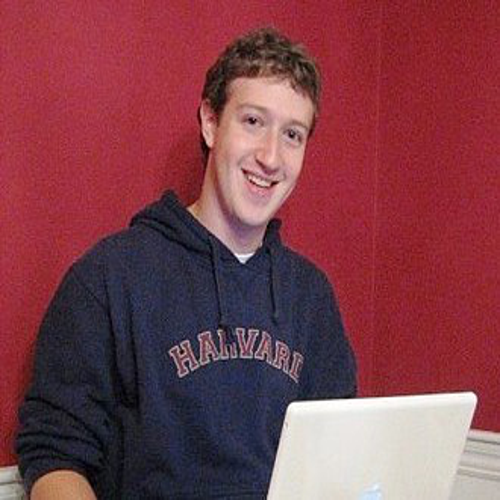

In [ ]:
#rescaling image
from PIL import Image
image = Image.open(path)
new_image = image.resize((500, 500))
new_image.save('myimage_500.jpg')
new_image.show()
display(new_image)

In [ ]:
#rescaling uisng open cv

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img=cv2.imread(path)
print('Image Width is',img.shape[1])
print('Image Height is',img.shape[0])
img_75 = cv2.resize(img, None, fx = 0.75, fy = 0.75)
cv2.imshow(img_75)

Image Width is 330
Image Height is 282


DisabledFunctionError: ignored